# UNSUPERVISED LEARNING PROJECT 

In [2]:
#Importing library

In [3]:
import pandas as pd

In [4]:
DF_cars=pd.read_csv('cars-dataset.csv')

In [5]:
DF_cars.head(2)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0


1)EDA & Pre-processing

In [6]:
print("This dataset has",DF_cars.shape[0],"rows.")
print("This dataset has",DF_cars.shape[1],"cloumns.")

This dataset has 398 rows.
This dataset has 8 cloumns.


In [7]:
DF_cars.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

The column "hp" is supposed to be numeric columnn but it's datatype is object which means there's irrelevant value present/value absent in the column.So checking for any missing or NaN values in this column.

In [8]:
DF_cars.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

As checked above there seems to be no "NaN" values but then what exactly is causing it to identify it as an 'object' dtype.

In [9]:
DF_cars.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

As seen above there seems to be the '?' at some location rather than a numeric value.Hence replacing the values at the above locations.

In [10]:
import numpy as np
DF_cars['hp']=DF_cars['hp'].replace('?',np.nan)

Checking the NaN values presence after the replacement operation.

In [11]:
DF_cars.isna().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [12]:
DF_cars[DF_cars['hp'].isna()]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


Repalcing the NaN values by median 

In [13]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median')
DF_cars.iloc[:,3:4]=imp.fit_transform(DF_cars.iloc[:,3:4])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Now there's no NaN values as checked still we'll check data types just to reconfirm.

In [14]:
DF_cars.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

Now this confirms there are no irrelevant data values present.

Checking the 5 point summary of the data values

In [15]:
DF_cars.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(DF_cars.mpg)
plt.show()
DF_cars[['mpg']].boxplot()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

The target variable shows a major spread from 12mpg-35mpg so that means big cars/ trucks would be included to the sedan/small cars which are fuel efficient are included.

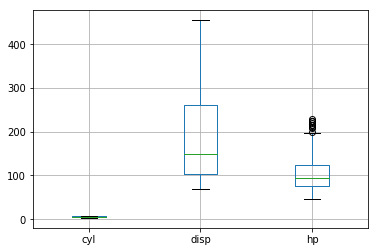

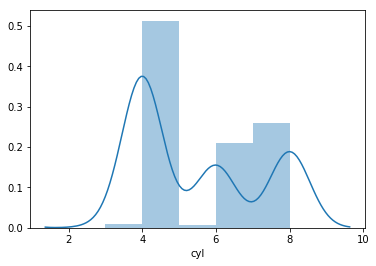

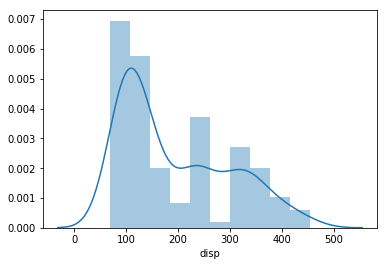

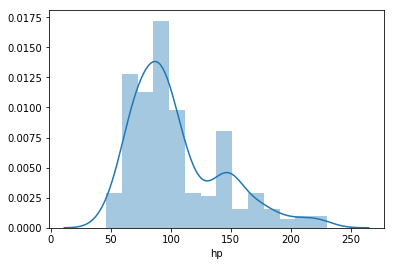

In [17]:
DF_cars[['cyl','disp','hp']].boxplot()
plt.show()
sns.distplot(DF_cars.cyl)
plt.show()
sns.distplot(DF_cars.disp)
plt.show()
sns.distplot(DF_cars.hp)
plt.show()


4 cylinders cars with the displacement of near around 100 & a horsepower of 60-100hp are the mostly used cars.

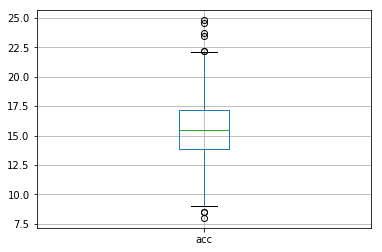

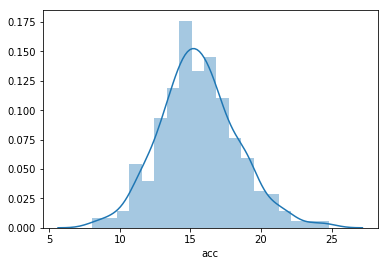

In [18]:
DF_cars[['acc']].boxplot()
plt.show()
sns.distplot(DF_cars.acc)
plt.show()

It has a normal distribution with the majority of acceleration lying between approx. 11-23

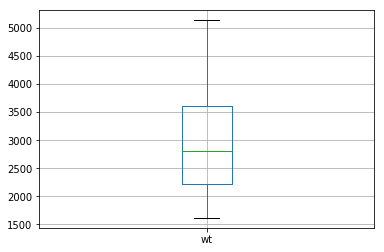

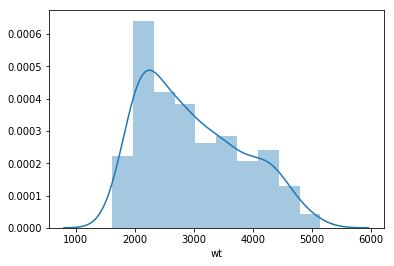

In [19]:
DF_cars[['wt']].boxplot()
plt.show()
sns.distplot(DF_cars.wt)
plt.show()


A lot of cars have a lower weight so cars from not so heavy-weight cars to a heavy have a greater distribution curve. A very less lie on the very heavy side. 

In [20]:
DF_cars.skew()

cyl     0.526922
disp    0.719645
hp      1.106224
wt      0.531063
acc     0.278777
yr      0.011535
mpg     0.457066
dtype: float64

The skewness seems to be positive which means all the columns have right tail wherein the skewness is too small to affect the data on a noticeable magnitude.

In [21]:
DF_cars=DF_cars.select_dtypes(exclude=object)

In [22]:
DF_cars.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


Dropping the year column since it's just a nominal value.

In [23]:
DF_cars.drop(columns='yr',inplace=True)

Since the data units are mixed hence standardizing the data using "Z-score"

In [24]:
from scipy.stats import zscore

cars_zs = DF_cars.apply(zscore)

In [25]:
cars_zs.shape

(398, 6)

In [26]:
cars_zs.head()

,cyl,disp,hp,wt,acc,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543


(6.5, -0.5)

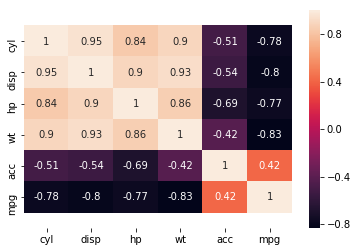

In [27]:
ax=sns.heatmap(DF_cars.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The cylinder ,displacement, horsepower & weight seems to be very least correlated to mpg.Let's check down further wih pairplot to check the the relations

2) Using pair plot to visualize how the different variables are related.

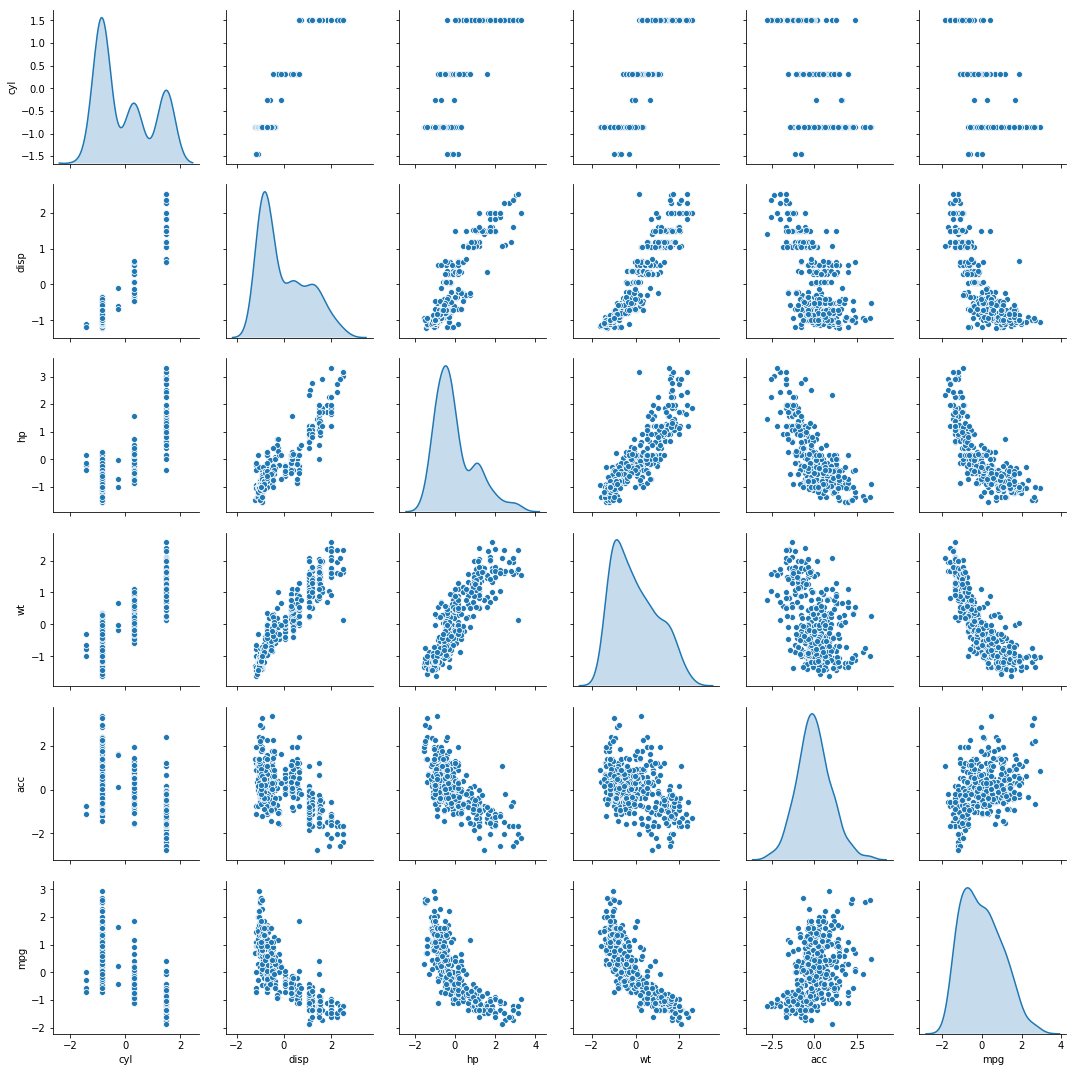

In [28]:
sns.pairplot(cars_zs,diag_kind='kde')

The target variable i.e. the mpg has a relationship which is curve a non-linear relation due to which it will hard for a linear model to exactly predict the target variable based on the independent variables.The amount of Gaussian curves in the pairplot shows that atleast 3 clusters might be present in the dataset.


3) Using K means to check the number of clusters present & visual analysis of the same can be done by using the Elbow plot.

In [29]:
cluster_errors=[]
cluster_sil_scores=[]
distortion=[]

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance
#importing cluster of diff. sizes to check for erros
cluster_range=range(1,10)

for i in cluster_range:
    clusters=KMeans(i,n_init=5)
    clusters.fit(DF_cars)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    distortion.append(sum(np.min(distance.cdist(cars_zs, centroids, 'euclidean'), axis=1))/ cars_zs.shape[0])
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors,"dist":distortion} )
clusters_df.head(10)



,num_clusters,cluster_errors,dist
0,1,2.896297e+08,2978.681794
1,2,7.428438e+07,2389.255251
2,3,3.420304e+07,2221.858631
3,4,1.905189e+07,2112.989529
4,5,1.376189e+07,2110.679094
5,6,1.029548e+07,2055.893750
6,7,7.689699e+06,1940.699602
7,8,5.662367e+06,1937.974044
8,9,4.723396e+06,1937.974044


Plotting the elbow plot so as to get a visual depiction of the optimal number of clusters

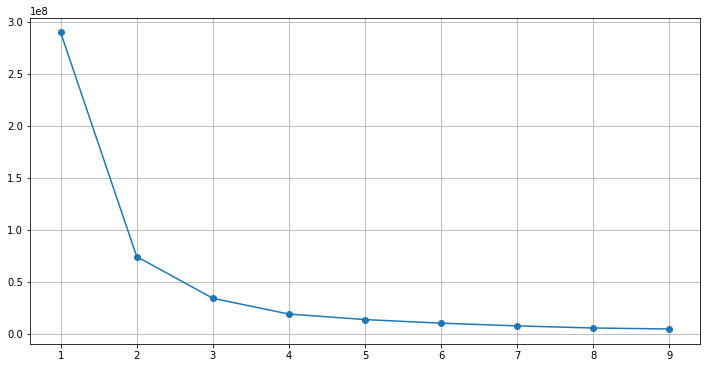

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid()

3 or 4 seems to be an optimal number of clusters.

In [31]:
prediction=clusters.predict(cars_zs)
cars_zs['group']=prediction

Checking with 3 clusters first

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002009A2AD470>,
      dtype=object)

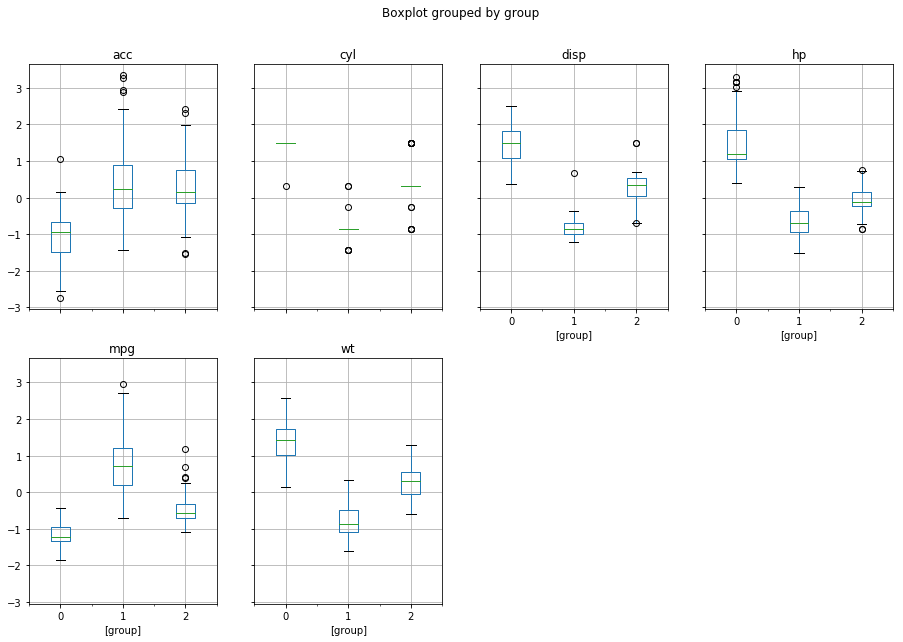

In [32]:
finalclusters=KMeans(3,n_init=5)
finalclusters.fit(cars_zs)
prediction=finalclusters.predict(cars_zs)
cars_zs['group']=prediction
cars_zs.boxplot(by='group',layout=(2,4),figsize=(15,10))

Boxes seem to be overlapping each other & a lot of outliers are present as well.Hence treating the outliers.

In [33]:
# Addressing outliers at group level

data = cars_zs   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (data.groupby('group').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_zs['group']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Since I've removed outliers and replaced them with median,there seems to be a clean graph with less overlapping after treating the outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002009C041048>,
      dtype=object)

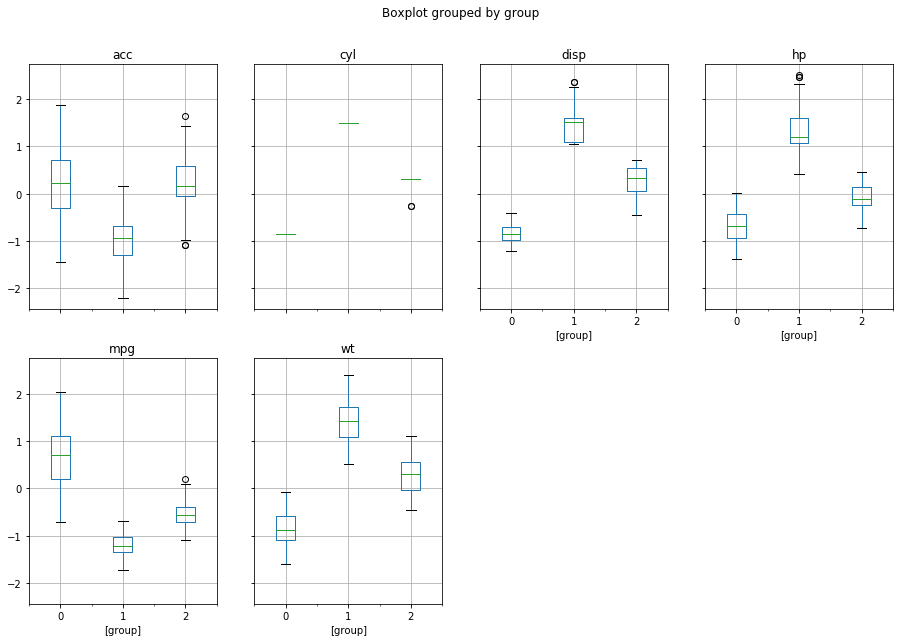

In [34]:
finalclusters=KMeans(3,n_init=5)
finalclusters.fit(concat_data)
prediction=finalclusters.predict(concat_data)
concat_data['group']=prediction
concat_data.boxplot(by='group',layout=(2,4),figsize=(15,10))

Checking with 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002009BF55BE0>,
      dtype=object)

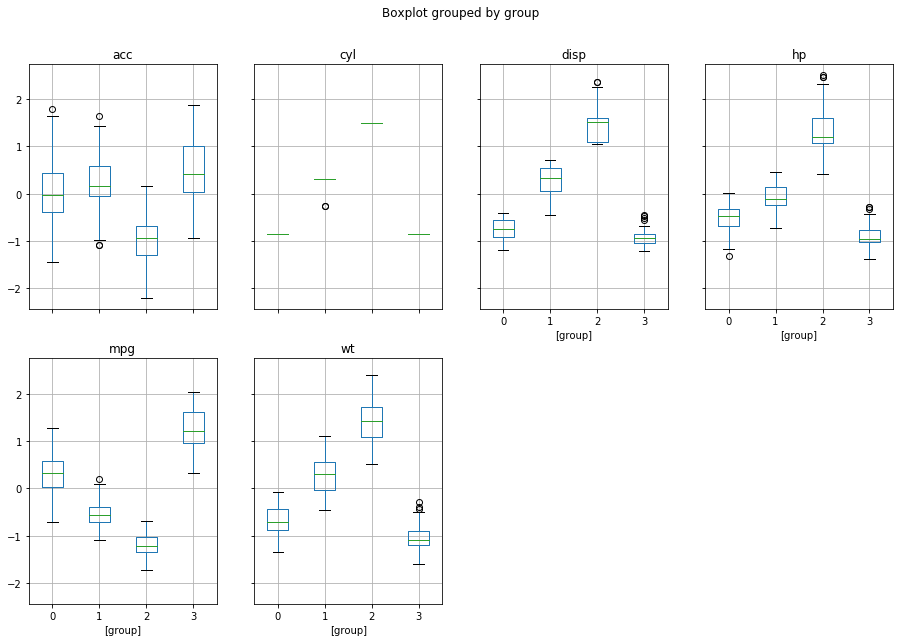

In [35]:
finalclusters=KMeans(4,n_init=5)
finalclusters.fit(concat_data)
prediction=finalclusters.predict(concat_data)
concat_data['group']=prediction
concat_data.boxplot(by='group',layout=(2,4),figsize=(15,10))

Thus 4 clusters prove to be more better clusters since the cluster's denoted in the form of group are more distinct than in the 3 cluster K means.

4) Using linear regression model on different clusters separately and printing the coefficients of the models individually

In [36]:
#Selecting 1st cluster
DF_cars1=concat_data[concat_data['group']==0]

In [37]:
DF_cars1.head()

,cyl,disp,hp,wt,acc,mpg,group
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,0.062185,0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,0.446497,0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,0.190289,0
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,0.062185,0
22,-0.856321,-0.858718,-0.243723,-0.703997,0.701436,0.190289,0


In [38]:
#mpg will be the target column 
X1=DF_cars1.drop(columns=['mpg','group'])
y1=DF_cars1[['mpg']]

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[ 0.          0.4085342  -0.15660066 -0.25637408 -0.2407735 ]]
The score of the model: 0.08763830695513652


In [40]:
#Selecting 2nd cluster
DF_cars2=concat_data[concat_data['group']==1]

In [41]:
X2=DF_cars2.drop(columns=['mpg','group'])
y2=DF_cars2[['mpg']]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[ 0.00738213 -0.21892774 -0.06670545 -0.10308766 -0.021344  ]]
The score of the model: 0.20194042797083644


In [43]:
#Selecting 3rd cluster
DF_cars3=concat_data[concat_data['group']==2]

In [44]:
X3=DF_cars3.drop(columns=['mpg','group'])
y3=DF_cars3[['mpg']]

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X3,y3,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[ 0.20280111 -0.02777401 -0.05236323 -0.27833111  0.0429615 ]]
The score of the model: 0.003035211522202874


In [46]:
#Selecting 4th cluster
DF_cars4=concat_data[concat_data['group']==3]

In [47]:
X4=DF_cars4.drop(columns=['mpg','group'])
y4=DF_cars4[['mpg']]

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X4,y4,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[ 0.         -0.26102242 -0.16819985  0.19678744 -0.17265284]]
The score of the model: 0.16120375307304824


Since the cluster has even less number of datapoints then the accuracy is further reduced.Trying regularized linear model on directly the last cluster to check performance improvement.

In [49]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=.03)
rd.fit(X_train,y_train)
y_pred=rd.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",rd.coef_)
print("The score of the model:",score)


The coefficients of the model are: [[ 7.17224252e-32 -2.37805296e-01 -1.66095674e-01  1.85356625e-01
  -1.71526642e-01]]
The score of the model: 0.16244742062361428


In [50]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=.0091)
ls.fit(X_train,y_train)
y_pred=ls.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",ls.coef_)
print("The score of the model:",score)

The coefficients of the model are: [-0.         -0.         -0.          0.         -0.12955515]
The score of the model: 0.1378174081349841


The regularization improves the performance a bit.